Adaline (ADAptive LInear Neuron) - адаптивный линейный нейрон. Нейрон "использующий химические мемнисторы "

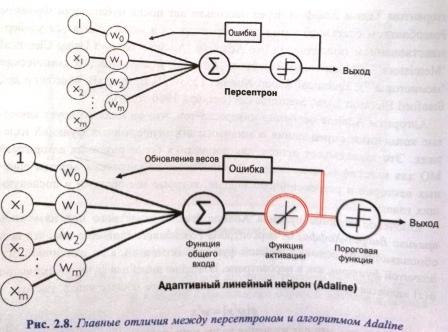

In [1]:
import numpy as np
"""
Параметры:
eta : float - скорость обучения (между 0,0 и 1,0)
n_iter: int - Проходы по обучающему набору данных.
shuffle: bool
"""
class AdalineGD(object):
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state 

  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_=rgen.normal(loc=0.0, scale=0.01, size = 1+X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
       net_input = self.net_input(X)
       output =  self.activation(net_input)
       errors = (y-output)
       self.w_[1:] += self.eta*X.T.dot(errors)
       self.w_[0] += self.eta*errors.sum()
       cost = (errors**2).sum()/2.0
       self.cost_.append(cost)
    return self
  def net_input(self,X):
    return np.dot(X,self.w_[1:])+self.w_[0]

  def activation(self,X):
    return X
    
  def predict(self,X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [2]:
import pandas as pd 
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None )
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


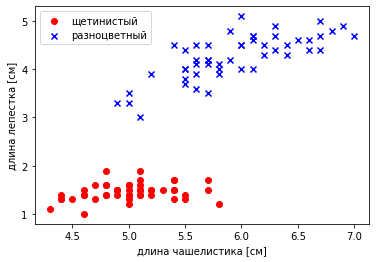

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# выбираем ирис щетинистый и ирис разноцветный 
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa',-1, 1)
X = df.iloc[0:100,[0,2]].values
# рисуем график 
plt.scatter(X[:50,0],X[:50,1],
            color = 'red', marker = 'o', label = 'щетинистый')
plt.scatter(X[50:100, 0],X[50:100, 1],
            color = 'blue', marker = 'x', label = 'разноцветный')
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()


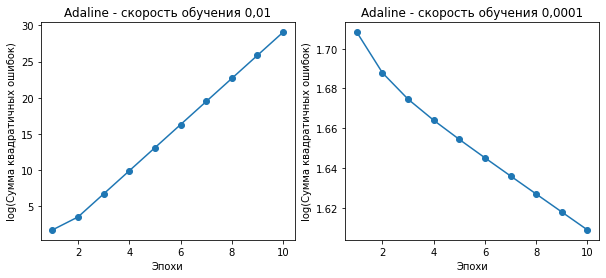

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=10,eta=0.01,).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1,),np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('log(Сумма квадратичных ошибок)')
ax[0].set_title('Adaline - скорость обучения 0,01')

ada2 = AdalineGD(n_iter=10,eta=0.0001,).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1,),np.log10(ada2.cost_),marker='o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('log(Сумма квадратичных ошибок)')
ax[1].set_title('Adaline - скорость обучения 0,0001')
plt.show()

In [5]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier, resolution = 0.2):
  markers = ('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min , x1_max = X[:,0].min()-1, X[:,0].max() + 1
  x2_min , x2_max = X[:,1].min()-1, X[:,1].max() + 1
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
  Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T) 
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],
                y=X[y==cl,1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black') 

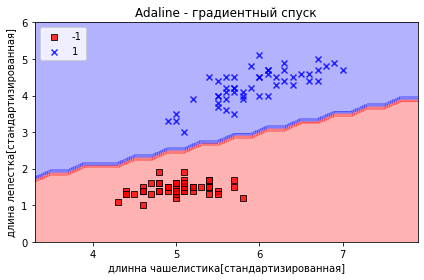

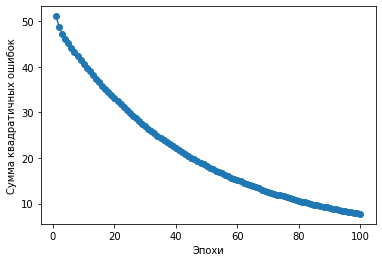

In [6]:
ada = AdalineGD(n_iter=100, eta=0.0001)
ada.fit(X,y)
plot_decision_regions(X,y,classifier=ada)
plt.title('Adaline - градиентный спуск')
plt.xlabel('длинна чашелистика[стандартизированная]')
plt.ylabel('длина лепестка[стандартизированная]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Сумма квадратичных ошибок')
plt.show()